In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Sales.csv')

In [3]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
#check total number of columns,entries note down your findings
df.info()
# There are total 18 number of columns and 113036 records.
# The Day, Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue columns are integer datatypes.
# And the other column's are of object(string) datatypes.
#There are total 9 integer datatypes and 9 object(string) datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [5]:
# find null values and if there are null values remove them.
df.isnull().sum()
#This dataset does not contain null values
#Hence there is no need to remove null values.

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [6]:
#Drop the Profit and Revenue column since it contains wrong data
df.drop(['Profit','Revenue','Cost'],axis=1,inplace=True)

In [7]:
df['Cost']=df['Order_Quantity']*df['Unit_Cost']

In [8]:
#Add Revenue and Profit columns with the correct data
df['Revenue']=df['Unit_Price']*df['Order_Quantity']
#As we know that revenue is Unit price times order Quantity

In [9]:
df['Profit']=df['Revenue']-df['Cost']
#And profit is the difference between revenue and cost

In [10]:
#Check for duplicate values in the dataset
df.duplicated().any()
#The output is "True", hence the dataset contains duplicate values

True

In [11]:
#Drop duplicates from the dataset and check again.
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().any()
#There are no duplicate values remaining

False

In [13]:
#find the only names of the columns
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Cost', 'Revenue', 'Profit'],
      dtype='object')

In [14]:
#find the columns and records 
df.shape
#It shows (records,columns)

(112036, 18)

In [15]:
#Check no. of unique value present in each column
df.nunique()
#The revenue column consist of most number of unique columns
#whereas the Product_category column consist of the least number of column

Date                1884
Day                   31
Month                 12
Year                   6
Customer_Age          70
Age_Group              4
Customer_Gender        2
Country                6
State                 53
Product_Category       3
Sub_Category          17
Product              130
Order_Quantity        32
Unit_Cost             34
Unit_Price            36
Cost                 360
Revenue              436
Profit               389
dtype: int64

In [16]:
#Find the statistics of each column
df.describe()
#The average profit and cost of all the bick products are 374.05 and 471.10 respectively.
#The average customer age that buys bike products is 35.
#The min and max customer age are 17 and 87.
#The mean is greater than median of each column, They all are Positively Skewed.

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Cost,Revenue,Profit
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,15.665607,2014.400925,35.919508,11.904254,267.819603,453.850628,471.103333,845.162162,374.058829
std,8.781485,1.273327,11.016543,9.564877,550.218722,922.751848,886.971635,1469.637711,596.460858
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,28.000000,70.000000,39.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,112.000000,245.000000,138.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,442.000000,900.000000,435.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,42978.000000,69136.000000,26158.000000


In [17]:
#Find the unique value of Customer gender column and write your findings
df['Customer_Gender'].unique()
#The unique value of the columns are 'M' and 'F',which means Male and Female

array(['M', 'F'], dtype=object)

In [18]:
#Based on the findings make the necessary changes in the columns
df['Customer_Gender']=df['Customer_Gender'].str.replace("M","Male")

In [19]:
df['Customer_Gender']=df['Customer_Gender'].str.replace("F","Female")

In [20]:
df['Customer_Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
#Find all the categorical columns
cat_col=df.select_dtypes(include=["O"]).columns
cat_col

Index(['Date', 'Month', 'Age_Group', 'Customer_Gender', 'Country', 'State',
       'Product_Category', 'Sub_Category', 'Product'],
      dtype='object')

In [22]:
#Find all the numerical columns
num_col=df.select_dtypes(include=["int","float"]).columns
num_col

Index(['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost',
       'Unit_Price', 'Cost', 'Revenue', 'Profit'],
      dtype='object')

In [23]:
#Find the average age of customer that buys only bikes
df[df['Product_Category']=='Bikes']['Customer_Age'].mean()
#The average age of a customer that buys Bikes is 35.51 

35.35108940063581

In [24]:
#Find which category of products the customer buys the most
pd.DataFrame(df.groupby('Product_Category')['Sub_Category'].value_counts())
#The customer buys mostly the accessories Tires and Tubes.
#And least buys the vests clothing

Sub_Category
Product_Category Sub_Category                   
Accessories      Tires and Tubes           33298
                 Bottles and Cages         15649
                 Helmets                   12150
                 Fenders                    4032
                 Cleaners                   1802
                 Hydration Packs            1334
                 Bike Racks                  592
                 Bike Stands                 455
Bikes            Road Bikes                13313
                 Mountain Bikes             8803
                 Touring Bikes              3678
Clothing         Jerseys                    6006
                 Caps                       4358
                 Gloves                     2686
                 Shorts                     1794
                 Socks                      1122
                 Vests                       964

In [25]:
#Find which product the customer buys the most
df['Product'].value_counts()
#The customer buys mostly the Water bottle - 30 oz product.
#And least buys the Mountain-500 Black,52 product.

Water Bottle - 30 oz.      10641
Patch Kit/8 Patches        10256
Mountain Tire Tube          6688
AWC Logo Cap                4358
Sport-100 Helmet, Red       4218
                           ...  
Mountain-100 Silver, 48       58
Mountain-100 Silver, 42       54
Mountain-500 Silver, 48       40
Road-650 Red, 52              32
Mountain-500 Black, 52        22
Name: Product, Length: 130, dtype: int64

In [26]:
#Find the average revenue of the country United kingdom of bikes category
df[(df['Country']=='United Kingdom')&(df['Product_Category']=='Bikes')]['Revenue'].mean()
#the average revenue of the country United kingdom of bikes category is 2330.44

2330.449067431851

In [27]:
#Find  how many male and female buys bike products and draw pie plot for same
df['Customer_Gender'].value_counts()
#The number Males are more than the number of females who buys the products of bike

Male      57813
Female    54223
Name: Customer_Gender, dtype: int64

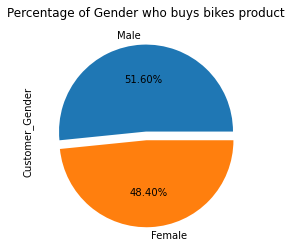

In [28]:
plt.title('Percentage of Gender who buys bikes product')
df['Customer_Gender'].value_counts().plot.pie(autopct="%1.2f%%",explode=(0,0.1))
plt.show()
#The pie graph shows that 51.60% Male and 48.40% of female buys products of bikes 

In [29]:
#which country purchases most number of bike products?
df['Country'].value_counts()
#The customers from country united states buys the most number of bike products
#The customers from country France buys the least number of bike products

United States     38840
Australia         23736
Canada            14027
United Kingdom    13486
Germany           11027
France            10920
Name: Country, dtype: int64

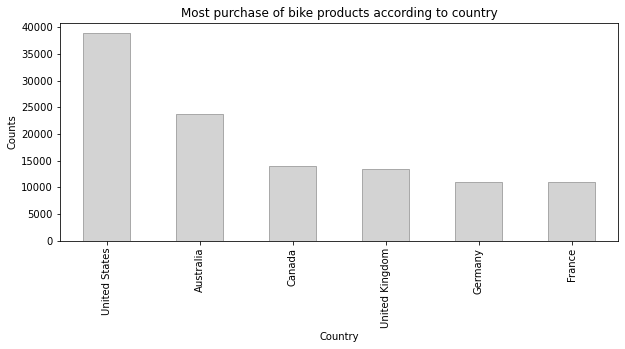

In [30]:
#draw bar plot of above data 
plt.figure(figsize=(10,4))
plt.title('Most purchase of bike products according to country')
plt.xlabel('Country')
plt.ylabel('Counts')
df['Country'].value_counts().plot(kind='bar',color='lightgrey',edgecolor='darkgrey')
plt.show()

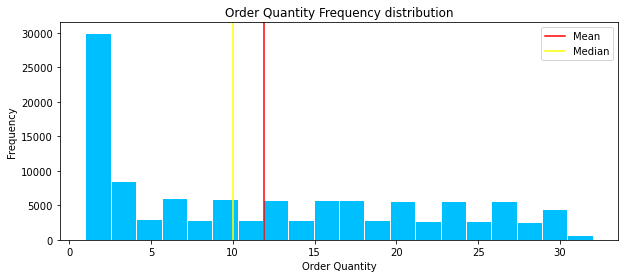

In [31]:
#Draw histogram of column order quantity showing mean and median
plt.figure(figsize=(10,4))
plt.hist(df['Order_Quantity'],color='deepskyblue',bins=20,edgecolor='white')
plt.axvline(df['Order_Quantity'].mean(),label='Mean',color='red')
plt.axvline(df['Order_Quantity'].median(),label='Median',color='yellow')
plt.legend(loc='upper right')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.title('Order Quantity Frequency distribution')
plt.show()
#The graph shows that between quantity 0 and 5 the frequency is more than the rest.
#The mean is greater than the median which indicates that the graph is positively skewed

In [32]:
#Find the skewness of revenue and show it through graph
df['Revenue'].skew()
#The value is positive hence it is right(positve) skewed

4.8897355217106035

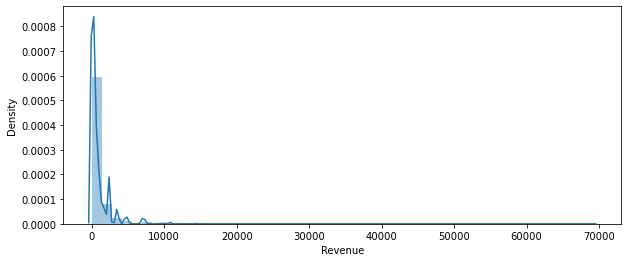

In [33]:
plt.figure(figsize=(10,4))
sns.distplot(df['Revenue'])
plt.show()
#As we can see the tail is on the right side in the graph 
#hence we can say that it is positively skewed

In [34]:
# find number of Age Distribution of Customers
df['Age_Group'].value_counts()
#The customer mostly are of group adults between 35 to 64 age 
#And the least are of group seniors more than 64 age

Adults (35-64)          55358
Young Adults (25-34)    38299
Youth (<25)             17660
Seniors (64+)             719
Name: Age_Group, dtype: int64

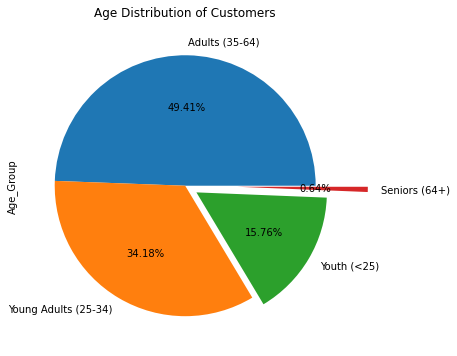

In [35]:
#draw pie diagram
plt.figure(figsize=(8,6))
plt.title('Age Distribution of Customers')
df['Age_Group'].value_counts().plot.pie(autopct="%1.2f%%",explode=(0,0,0.1,0.4))
plt.show()
#the pie diagram shows that 49.41% are adults age between 35 to 64
#and 0.64% of seniors age more than 64 that buys the bike products

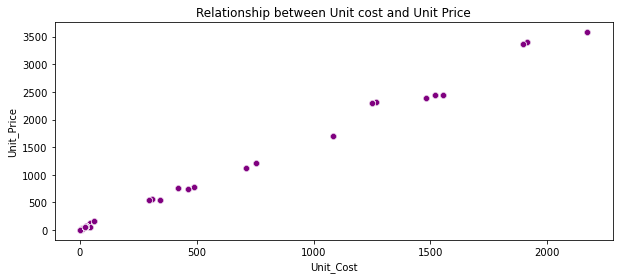

In [36]:
#What is the relationship between Unit cost and Unit price?
plt.figure(figsize=(10,4))
plt.title('Relationship between Unit cost and Unit Price')
sns.scatterplot(df['Unit_Cost'],df['Unit_Price'],color='purple')
plt.show()
#The graph shows that the relationship is positve which in dicates that they are positively corelated

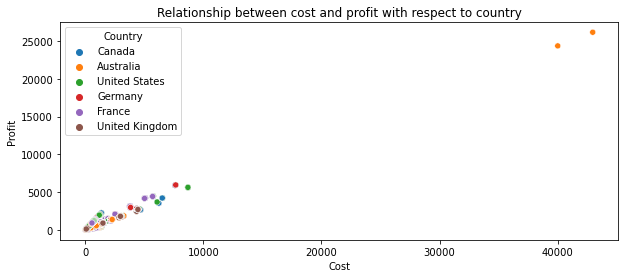

In [37]:
#What is the relationship between cost and profit with respect to country?
plt.figure(figsize=(10,4))
plt.title('Relationship between cost and profit with respect to country')
sns.scatterplot(df['Cost'],df['Profit'],hue=df['Country'])
plt.show()
#The graph shows that the relationship is positve which indicates that they are positively corelated with respect to country

In [38]:
# find Most Profitable Year and draw bar plot
df.groupby('Year')['Profit'].sum()

Year
2011    3976543
2012    4047960
2013    7687922
2014    7361372
2015    9870012
2016    8964246
Name: Profit, dtype: int64

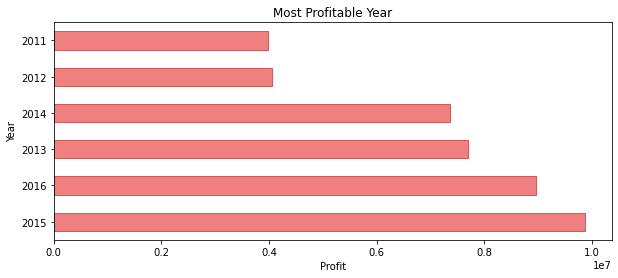

In [39]:
plt.figure(figsize=(10,4))
plt.title('Most Profitable Year')
plt.xlabel('Profit')
df.groupby('Year')['Profit'].sum().sort_values(ascending=False).plot(kind="barh",color='lightcoral',edgecolor='indianred')
plt.show()
#The most profitable year is in 2011
#The least is in 2011

In [40]:
# find Most Profitable month and draw bar plot
df.groupby('Month')['Profit'].sum()

Month
April        3729936
August       2841638
December     4459854
February     3323903
January      3422588
July         2795784
June         4395021
March        3596522
May          4327168
November     3103017
October      2997238
September    2915386
Name: Profit, dtype: int64

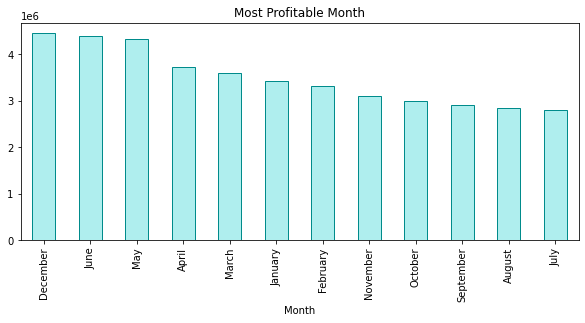

In [41]:
plt.figure(figsize=(10,4))
plt.title('Most Profitable Month')
plt.xlabel('Profit')
df.groupby('Month')['Profit'].sum().sort_values(ascending=False).plot(kind="bar",color='paleturquoise',edgecolor='darkcyan')
plt.show()
#The most profitable year is in 2011
#The least is in july

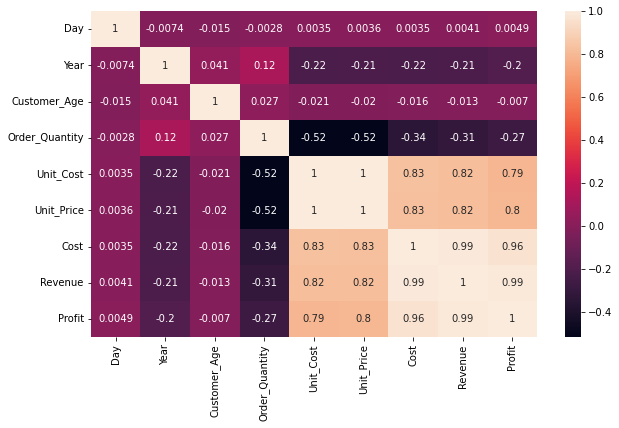

In [42]:
#find the relation between all the numerical column
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [43]:
#The value which are positive have positive correlation and the value which are negative have negative corelation
#The diagonal line have value 1 because the relations intersect with same column.
#In heatmap the value which is close to 1 are stongly corelated
#for example: unit cost and unit price,unit price and cost, revenue and cost,profit and revenue
#The value which is far from 1 are weakly corelated
#for example: revenue and order quantity,profit and order quantity,etc